## 11. テキストデータを用いた予測
### 11.1 テキストの経時的分析
営業日報、アンケート調査など情報システムに記録されるテキストデータは、経時的に並べることができる。  
このようなデータを分析する際には、時間と共になにがどのように変化しているかを分析する必要がある。  
例えば、経済情報に関するテキストデータを説明変数とし、  
債券や経済指標など経時的な量的データを目的変数として回帰分析を行うことも可能である。  
ここでは、テキストの経時的分析の例として文章の執筆時期の推定問題を取り上げ、その分析方法を説明する。

### 11.2 重回帰分析の定式
回帰分析は線形回帰と非線形回帰に分けられr、説明変数が2つ以上の場合は重回帰と呼ぶ。
#### 重回帰分析の定式
重回帰分析では、観測データを次の式で表す。  
複数の説明変数は$x_1,x_2,\cdots,x_p$で表され、$\beta_1,\beta_2,\cdots,\beta_p$はそれぞれの変数に対する重みであり、$\epsilon_i$は次に示す実測値$y_i$と予測値$\hat{y}_i$の差である。  
$$
y_i=\beta_0+\beta_1x_1+\beta_2x_2+\cdots+\beta_px_p+\epsilon_i
$$
回帰分析で求める回帰式は、次に示すような近似式である。
$$
\hat{y}_i=\beta_0+\beta_1x_1+\beta_2x_2+\cdots+\beta_px_p
$$
回帰分析では、得られたデータからもっとも適切と思われる係数$\beta_i$を求めることが主な目的である。  
これらは、実測値$y_i$と回帰式による予測値$\hat{y}_i$との差の2乗を最小二乗法で求めることができる。  
$$
\beta=\begin{bmatrix}
\beta_0\\
\beta_1\\
\vdots\\
\beta_p
\end{bmatrix},\ 
Y=\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix},\ 
X=\begin{bmatrix}
1&x_{11}&\cdots&x_{1p}\\
1&x_{21}&\cdots&x_{2p}\\
\vdots&\vdots&&\vdots\\
1&x_{n1}&\cdots&x_{np}
\end{bmatrix},\ 
E=\begin{bmatrix}
\epsilon_1&0&\cdots&0\\
0&\epsilon_2&\cdots&0\\
\vdots&\vdots&&\vdots\\
0&0&\cdots&\epsilon_n
\end{bmatrix}
$$
データの真のモデルは$Y=X\beta+E$、その回帰式は$\hat{Y}=X\beta$で表すことができる。  
係数の推測値は$\beta=(X^TX)^{-1}X^TY$となる。  
#### 変数の選択
できるだけ少ない説明変数を用いてシンプルな式を構築したほうが良い。  
推測された係数の検定統計量を用いてその寄与度を評価することができる。  
推測された係数の$t$値が小さく、その$t$値に対応する$p$値が大きいほど寄与の度合が低い。  
**変数の選択方法**としては、変数増加法、変数減少法、変数増減法などがある。  
変数増加法は、寄与度がもっとも高い変数から順次、変数を増やしながら最善と評価される回帰式を構築し、  
変数減少法は寄与度がもっとも低い変数から順に削除しながら最善と評価される回帰式を構築する。  
変数増減法(ステップワイズ法)は、変数の削除と追加を繰り返しながら最善と評価される回帰式を構築する。  
  
回帰式を評価する指標としては重相関係数、補正済み重相関係数、回帰係数の検定統計量$F$値などがある。  
他にも、赤池情報量基準量(AIC)があり、次のように定義されている。
$$
AIC=-2×(モデルの最大対数尤度)+2×(モデルのパラメータ数)
$$
AICの値が小さいモデルが良いモデルであると評価する。

#### 文学作品の執筆時期の推定
文章の執筆時期の推定について、芥川龍之介の作品を用いて分析してみる。  
クリーニングと形態素解析を行い、助詞のみを集計したデータを用いる。  
数値は、各助詞がその作品の中の助詞全体に占める相対頻度である。

In [3]:
import pandas as pd

d1 = pd.read_csv('study/参考書/テキストアナリティクス/JYO113.csv', encoding='shift-jis', index_col=0)
d1

,y,の.接続助詞.,を.格助詞.,は.副助詞.,に.格助詞.,と.格助詞.,が.格助詞.,も.副助詞.,の.格助詞.,へ.格助詞.,...,だの.接続助詞.,と.接続助詞.,か.終助詞.,より.接続助詞.,しか.副助詞.,まで.接続助詞.,のみ.副助詞.,なら.副助詞.,やら.接続助詞.,OTHERS
T03-04老年,1914.31,0.224,0.106,0.088,0.125,0.108,0.096,0.053,0.029,0.018,...,0.000,0.002,0.0,0.000,0.000,0.000,0.000,0.002,0.000,0.006
T03-12ひょっとこ,1914.92,0.167,0.129,0.110,0.098,0.116,0.103,0.040,0.017,0.022,...,0.000,0.001,0.0,0.001,0.003,0.001,0.000,0.001,0.002,0.000
T04-08松江印象記,1915.62,0.206,0.173,0.120,0.165,0.122,0.059,0.035,0.037,0.010,...,0.000,0.002,0.0,0.000,0.000,0.008,0.006,0.000,0.000,0.010
T04-09羅生門,1915.69,0.181,0.163,0.119,0.113,0.080,0.080,0.031,0.037,0.026,...,0.000,0.004,0.0,0.001,0.000,0.000,0.000,0.002,0.000,0.000
T05-01鼻,1916.08,0.158,0.154,0.146,0.114,0.069,0.087,0.048,0.030,0.021,...,0.001,0.000,0.0,0.001,0.000,0.000,0.001,0.000,0.000,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S2-06古千屋,1927.46,0.238,0.163,0.174,0.192,0.032,0.006,0.044,0.047,0.020,...,0.000,0.000,0.0,0.000,0.000,0.003,0.000,0.000,0.000,0.000
S2-07或阿呆の一生,1927.54,0.227,0.166,0.202,0.158,0.037,0.012,0.039,0.036,0.014,...,0.001,0.000,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.000
S2-08冬,1927.62,0.198,0.156,0.175,0.193,0.041,0.014,0.051,0.037,0.026,...,0.000,0.000,0.0,0.001,0.000,0.001,0.000,0.000,0.000,0.001
S2-08西方の人,1927.62,0.230,0.142,0.209,0.171,0.041,0.000,0.060,0.030,0.005,...,0.000,0.000,0.0,0.001,0.000,0.000,0.000,0.001,0.000,0.001


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV, SequentialFeatureSelector

# 特徴量選定
rfecv = RFECV(
    estimator=LinearRegression(),
    n_jobs=-1,
    scoring="r2",
    cv=10,
)
rfecv.fit(d1.iloc[:,1:], d1.iloc[:,0])

RFECV(cv=10, estimator=LinearRegression(), n_jobs=-1, scoring='r2')

In [13]:
from sklearn.metrics import r2_score

pred = rfecv.predict(d1.iloc[:,1:])
print(r2_score(d1.iloc[:,0], pred))

0.9342915045608673


In [27]:
result = pd.DataFrame(rfecv.get_support(), index=d1.columns.values[1:], columns=['False: dropped'])
result['ranking'] = rfecv.ranking_
result = result.sort_values('ranking')
print(result)
print(d1.columns[1:][rfecv.support_])

           False: dropped  ranking
より.格助詞.              True        1
だの.接続助詞.             True        1
なり.接続助詞.             True        1
など.副助詞.              True        1
より.接続助詞.             True        1
又.接続助詞.              True        1
さえ.副助詞.              True        1
また.接続助詞.             True        1
まま.接続助詞.             True        1
やら.接続助詞.             True        1
だけ.副助詞.              True        1
でも.副助詞.              True        1
から.格助詞.              True        1
に.接続助詞.              True        1
も.副助詞.               True        1
を.格助詞.               True        1
なら.副助詞.              True        1
のみ.副助詞.              True        1
と.格助詞.               True        1
が.格助詞.               True        1
で.格助詞.               True        1
か.終助詞.               True        1
まで.接続助詞.             True        1
ながら.接続助詞.            True        1
が.接続助詞.             False        2
や.接続助詞.             False        3
から.接続助詞.            False        4
ばかり.副助詞.            

In [29]:
reg1 = LinearRegression().fit(rfecv.transform(d1.iloc[:,1:]), d1.iloc[:,0])

pred = reg1.predict(rfecv.transform(d1.iloc[:,1:]))
print(r2_score(d1.iloc[:,0], pred))

0.9342915045608673


このような予測分析を行う際に重要なのは、作成した回帰モデルにおいて目的変数に大きく影響を与えている説明変数が何かを分析することである。  

In [37]:
weights = pd.DataFrame({'feature':d1.columns[1:][rfecv.support_],
                        'weight':reg1.coef_}).sort_values('weight').reset_index(drop=True)
weights.head(15)

,feature,weight
0,のみ.副助詞.,-556.737406
1,さえ.副助詞.,-80.534328
2,か.終助詞.,-71.678936
3,やら.接続助詞.,-71.366051
4,より.接続助詞.,-62.227616
5,から.格助詞.,-56.980995
6,でも.副助詞.,-52.002538
7,が.格助詞.,-51.925357
8,で.格助詞.,-46.098606
9,を.格助詞.,-33.063683


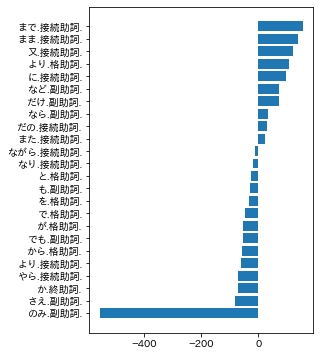

In [45]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(4, 6))

plt.barh(y=weights['feature'],
         width=weights['weight']);

In [48]:
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=15, cv=5)
selector.fit(d1.iloc[:,1:], d1.iloc[:,0])

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=15)

In [50]:
reg1 = LinearRegression().fit(selector.transform(d1.iloc[:,1:]), d1.iloc[:,0])


pred = reg1.predict(selector.transform(d1.iloc[:,1:]))
print(r2_score(d1.iloc[:,0], pred))

0.9069907856439049


In [52]:
weights = pd.DataFrame({'feature':d1.columns[1:][selector.support_],
                        'weight':reg1.coef_}).sort_values('weight').reset_index(drop=True)
weights.head(15)

,feature,weight
0,なり.接続助詞.,-119.965405
1,で.格助詞.,-69.944002
2,さえ.副助詞.,-62.347298
3,が.格助詞.,-58.922483
4,かも.接続助詞.,-56.717382
5,から.格助詞.,-45.165702
6,を.格助詞.,-40.387446
7,と.格助詞.,-34.922067
8,も.副助詞.,-31.042469
9,ばかり.副助詞.,-8.481888


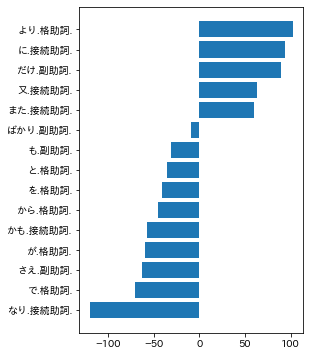

In [53]:
plt.figure(figsize=(4, 6))

plt.barh(y=weights['feature'],
         width=weights['weight']);

### 11.3 正則化回帰モデル
学習データの量が不十分であったり変数が多すぎたりすると、過学習が起こる場合がある。  
これを避けるために正則化が行われる。  
**正則化回帰モデル**は、通常の最小二乗法に罰則を加えて推定量を縮小し、次元を削減させる方法である。  
もっとも基本的なものは、ridge回帰とLasso回帰、両者を折衷するElastic net回帰である。  
従来の重回帰分析は次式のように残差の2乗和を最小化することによって回帰係数を求めている。  
$$
\beta_{lm}=\arg\min\{(Y-\hat{Y})^2\}=\arg\min\{(Y-X\beta)^2\}
$$
正則化回帰モデルは、以下のように示される。  
$\lambda$は罰則の強さを調整するパラメータであり、$\lambda$が大きくなるほど罰則が強くなる。  
また、$q$の大きさによって回帰の名称が変わる。  
$$
\beta_{regu}=\arg\min\bigl\{(Y-\hat{Y})^2+\lambda\sum_{j=1}^p|\beta_j|^2\bigr\}
$$
#### L1正則化lasso回帰
$q=1$の時の回帰を**L1正則化**、もしくは**lasso回帰**と呼ぶ。  
$$
L(\beta)=\frac{1}{2}\sum_{i=1}^n(y_i-\beta X_i)^2+\lambda\sum_{j=1}^p|\beta_j|
$$
正則化項は絶対値であり、微分できない。  
lasso回帰モデルの構築では、説明変数の間に強い相関がある場合、その中から代表的な説明変数のみを用いることで多重共線性を回避する。  
**多重共線性**とは、説明変数間に強い相関がある際に、計算された回帰係数の富豪が逆になり解釈に矛盾が生じることをいう。  
lasso回帰は係数の一部を0にし、次元の削減をする効果を持つため、スパース回帰とも呼ばれる。  
ただし、変数の数が標本サイズよりかなり大きい場合、予測精度を高めることが困難である。  
#### LS正則化ridge回帰
$q=2$の時の回帰を**L2正則化**、もしくは**ridge回帰**と呼ぶ。
$$
L(\beta)=\frac{1}{2}\sum_{i=1}^n(y_i-\beta X_i)^2+\frac{\lambda}{2}\sum_{j=1}^p\beta_j^2
$$
$L(\beta)$を$\beta$で微分した最小化方程式を解くと、次のような推測関数が得られる。
$$
\hat{\beta}=\arg\min L(\beta)=(\lambda I+X^TX)^{-1}X^TY
$$
#### Elastic net回帰
**Elastic net回帰**は、lasso回帰において、モデルに取り込める説明変数の数に制限があるという問題に対処できる推定法である。  
次式のように正則化を行う。
$$
L(\beta)=\frac{1}{2}\sum_{i=1}^n(y_i-\beta X_i)^2+\sum_{j=1}^p\{\lambda_2\beta_j^2+\lambda_1|\beta_j| \}
$$
$\alpha=\lambda_2/(\lambda_1+\lambda_2)$とすると、上式は次式に書き換えられる。

$$
L(\beta)=\frac{1}{2}\sum_{i=1}^n(y_i-\beta X_i)^2+\lambda\sum_{j=1}^p\{\alpha\beta_j^2+(1-\alpha)|\beta_j| \}
$$
#### 正則化回帰モデルによる執筆時期の推定
lasso回帰を用いた例を示す。  
交差検証法を用いて$\lambda$を推定する。

In [379]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import Lasso
import numpy as np

param_grid = {
    "alpha":  np.logspace(-6, 1, num=70, base=np.exp(1))
}

search = GridSearchCV(Lasso(normalize=True), param_grid, scoring="neg_mean_squared_error", cv=10)
search.fit(d1.iloc[:,1:], d1.iloc[:,0].values)

GridSearchCV(cv=10, estimator=Lasso(normalize=True, selection='random'),
             param_grid={'alpha': array([2.47875218e-03, 2.74341791e-03, 3.03634300e-03, 3.36054480e-03,
       3.71936286e-03, 4.11649328e-03, 4.55602681e-03, 5.04249100e-03,
       5.58089681e-03, 6.17679024e-03, 6.83630945e-03, 7.56624803e-03,
       8.37412491e-03, 9.26826184e-03, 1.02578692e-02, 1.13531406e-02,
       1.25653583e-0...
       3.22892838e-01, 3.57369325e-01, 3.95526998e-01, 4.37758909e-01,
       4.84500081e-01, 5.36231984e-01, 5.93487498e-01, 6.56856399e-01,
       7.26991437e-01, 8.04615058e-01, 8.90526847e-01, 9.85611761e-01,
       1.09084925e+00, 1.20732334e+00, 1.33623382e+00, 1.47890855e+00,
       1.63681720e+00, 1.81158635e+00, 2.00501627e+00, 2.21909943e+00,
       2.45604105e+00, 2.71828183e+00])},
             scoring='neg_mean_squared_error')

<ErrorbarContainer object of 3 artists>

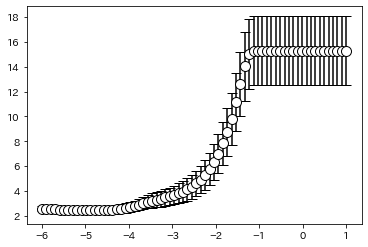

In [380]:
grid_mean = search.cv_results_['mean_test_score']
grid_std = search.cv_results_['std_test_score']/np.sqrt(113)*1.96

plt.errorbar(np.linspace(-6, 1, 70), -grid_mean, yerr = grid_std, capsize=5, fmt='o', markersize=10, ecolor='black', markeredgecolor = "black", color='w')

MSEが最も小さいときの$\lambda$をモデルの最適なパラメータとし、そのモデルを用いて予測・推定を行う。

In [381]:
print(search.best_params_)

{'alpha': 0.009268261844366918}


In [383]:
lasso = Lasso(**search.best_params_,normalize=True)

lasso.fit(d1.iloc[:,1:], d1.iloc[:,0].values)

Lasso(alpha=0.009268261844366918, normalize=True)

作成されたモデルにおける非ゼロの係数を以下に示す。

In [387]:
weights = pd.DataFrame({'feature':d1.columns[1:],
                        'weight':lasso.coef_}).sort_values('weight').reset_index(drop=True)
weights[weights["weight"]>0]

,feature,weight
29,の.接続助詞.,3.463146
30,が.接続助詞.,4.751971
31,に.格助詞.,7.827132
32,だけ.副助詞.,9.880574
33,は.副助詞.,10.388483
34,だの.接続助詞.,52.826866
35,又.接続助詞.,58.300047
36,など.副助詞.,58.920228
37,に.接続助詞.,65.362583
38,より.格助詞.,78.138588


Elastic net回帰を用いて、$\alpha$と$\lambda$についてグリッドサーチを行う。

In [398]:
from sklearn.linear_model import ElasticNet

param_grid = {
    "alpha":  np.arange(0.1,1,0.1),
    "l1_ratio": np.arange(0.1,1,0.1)
}

search = GridSearchCV(ElasticNet(normalize=True, max_iter=100), param_grid, scoring="neg_mean_squared_error", cv=10)
search.fit(d1.iloc[:,1:], d1.iloc[:,0].values)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100, normalize=True),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error')

In [399]:
print(search.best_params_)

{'alpha': 0.1, 'l1_ratio': 0.9}


In [400]:
EN = ElasticNet(**search.best_params_,normalize=True)

EN.fit(d1.iloc[:,1:], d1.iloc[:,0].values)

ElasticNet(alpha=0.1, l1_ratio=0.9, normalize=True)

In [401]:
weights = pd.DataFrame({'feature':d1.columns[1:],
                        'weight':EN.coef_}).sort_values('weight').reset_index(drop=True)
weights[weights["weight"]>0]

,feature,weight
37,に.格助詞.,5.925571
38,は.副助詞.,13.331322
39,まま.接続助詞.,25.105304


### 11.4 ランダムフォレスト
回帰木は階段式の回帰折れ線で予測を行う。  
アンサンブル学習、なかでもランダムフォレスト法は回帰問題にも有効である。  
ランダムフォレスト法は、異なる複数の折れ線の平均値を用いて回帰の結果とする。  


In [404]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=0, max_depth=3, n_estimators=500, n_jobs=-1)
rf_reg.fit(d1.iloc[:,1:], d1.iloc[:,0].values)

RandomForestRegressor(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

回帰木のノードの純度の増分に基づいて計算された変数の重要度の結果を示す。  
重要と判断された変数は、上から順に「が」「は」「で」である。

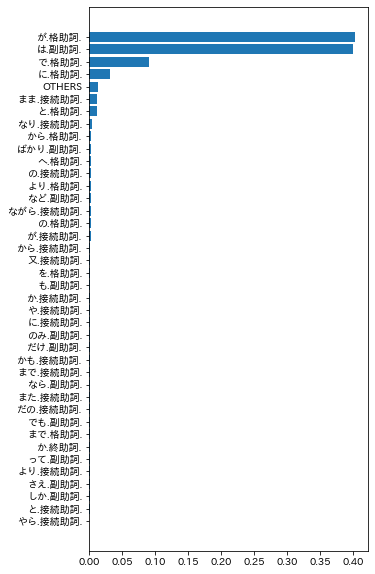

In [405]:
importance =pd.DataFrame({'feature':d1.columns[1:],
                          'importance':rf_reg.feature_importances_})\
                .sort_values('importance', ascending=True).reset_index(drop=True)

plt.figure(figsize=(5,10))

plt.barh(y=importance['feature'],
         width=importance['importance']);

この3つの変数が時間と共にどのように変化しているかを考察するため、横軸を各作品の発表年とし、縦軸を使用率とした散布図を示す。

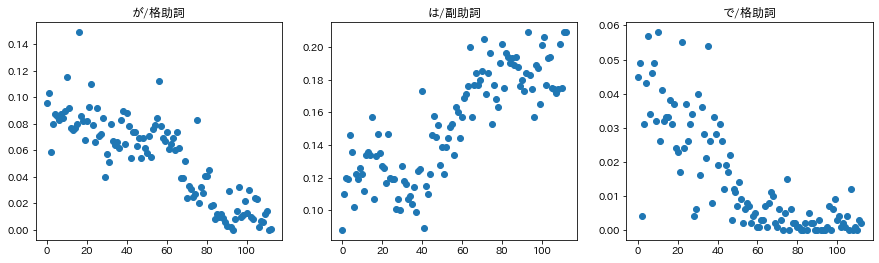

In [420]:
fig, axis = plt.subplots(1, 3, figsize=(15,4))

axis[0].scatter(np.arange(len(d1)), d1['が.格助詞.']);
axis[0].set_title('が/格助詞');
axis[1].scatter(np.arange(len(d1)), d1['は.副助詞.']);
axis[1].set_title('は/副助詞');
axis[2].scatter(np.arange(len(d1)), d1['で.格助詞.']);
axis[2].set_title('で/格助詞');

### 11.5 トピックの経時的分析
テキストの数がそれほど多くない場合のマクロ的なトピック分析には、主成分分析や階層的クラスタリングなどの方法が利用できる。  
階層的クラスター分析法によっても、トピックの傾向を考察することが可能である。  
ここでは、歴代総理大臣の所信表明演説文を例として示す。

In [421]:
d2 = pd.read_csv('study/参考書/テキストアナリティクス/rekidai.csv', encoding='shift-jis', index_col=0)
d2

,経済,国民,社会,改革,政治,国際,関係,世界,政府,協力,...,集約,離職,電話,非行,預金,額,風評,高校,ＣＯＰ,OTHERS
19531130_18_yoshida-shigeru,2,4,0,0,0,0,4,1,12,2,...,0,0,0,0,0,0,0,0,0,43
19541130_20_yoshida-shigeru,10,3,3,0,1,3,7,0,3,3,...,0,0,0,0,0,0,0,0,0,69
19551202_23_hatoyama-ichiro,0,11,1,3,9,0,1,0,1,2,...,0,0,0,0,0,0,0,0,0,34
19561116_25_hatoyama-ichiro,10,9,1,0,1,7,2,13,0,1,...,0,0,0,0,0,0,0,0,0,43
19570227_26_kishi-nobusuke,2,8,0,0,4,2,0,2,1,1,...,0,0,0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111028_179_noda-yoshihiko,9,14,0,10,6,2,4,4,9,1,...,0,0,0,0,0,0,1,0,0,135
20121029_181_noda-yoshihiko,26,11,24,11,15,4,7,6,4,0,...,0,0,0,0,0,1,1,0,0,154
20130128_183_abe-shinzo,16,7,10,1,1,1,2,4,5,3,...,0,0,0,0,0,1,0,0,0,91
20131015_185_abe-shinzo,9,6,7,8,1,2,0,17,0,1,...,0,0,0,0,0,0,2,0,0,96


In [427]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

#method_list = ("average", "centroid", "complete", "median", "single", "ward", "weighted")
#metric_lits = ('braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine',
#               'euclidean', 'hamming', 'jaccard', 'jensenshannon')

d_array = np.array(d2.iloc[:,:-1])
d_array = d_array / np.sum(d_array, axis=1).reshape(-1,1)+1e-6

result_jsd = linkage(pdist(d_array, metric = "jensenshannon"),
                  #metric = "euclidean",
                  method = "ward"
                   );

<Figure size 576x288 with 0 Axes>

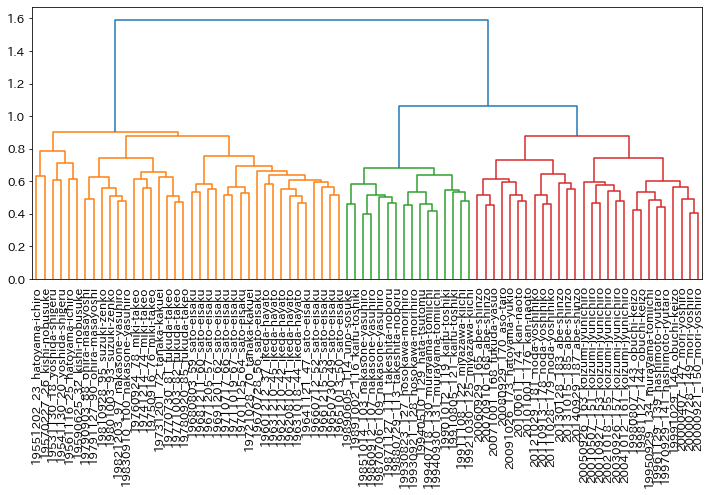

In [436]:
plt.figure(figsize=(12,5))

dendrogram(result_jsd, color_threshold=1., labels=d2.index);
plt.tick_params(labelsize=12);

左のクラスターは1950年代から1970年代前半までに、中間のクラスターは1970年代後半から1990年代前半までに、  
右のクラスターは1990年代後半以降にほぼ対応している。  
樹形図だけでは各クラスターのトピックの詳細については確認できないが、経時的に変化していることは確認できる。  
トピック分析を行うときはまず、トピックをいくつにするかを分析者が決めなければならない。  
トピックを決める方法はいくつか提案されているが、的中確率は総じては高くない。

In [448]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

ppl = []
for i in np.arange(1,11):
    lda = LDA(max_iter=25,
              learning_method='batch',
              n_components=i).fit(d2.iloc[:,:-1])

    ppl += [lda.perplexity(d2.iloc[:,:-1])]

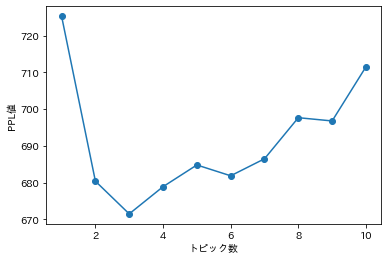

In [449]:
plt.plot(np.arange(1,11), ppl, '-o');
plt.xlabel('トピック数');
plt.ylabel('PPL値');

In [461]:
d_tmp = d2['経済'].map(lambda x: x*['経済'])
for i in np.arange(len(d2.columns[1:-1])):
    c = d2.columns[i]
    d_tmp += d2[c].map(lambda x: x*[c])
d_tmp

19531130_18_yoshida-shigeru    [経済, 経済, 経済, 経済, 国民, 国民, 国民, 国民, 関係, 関係, 関係, 関...
19541130_20_yoshida-shigeru    [経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経...
19551202_23_hatoyama-ichiro    [国民, 国民, 国民, 国民, 国民, 国民, 国民, 国民, 国民, 国民, 国民, 社...
19561116_25_hatoyama-ichiro    [経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経...
19570227_26_kishi-nobusuke     [経済, 経済, 経済, 経済, 国民, 国民, 国民, 国民, 国民, 国民, 国民, 国...
                                                     ...                        
20111028_179_noda-yoshihiko    [経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経...
20121029_181_noda-yoshihiko    [経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経...
20130128_183_abe-shinzo        [経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経...
20131015_185_abe-shinzo        [経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経...
20140929_187_abe-shinzo        [経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経済, 経...
Name: 経済, Length: 82, dtype: object

In [569]:
dictionary = gensim.corpora.Dictionary(np.array(d_tmp))
# 最少出現ワード数
no_below = 1
# 全文書に対する特定ワードが出現する文章の最大割合
no_above = 0.6
dictionary.filter_extremes(no_below=no_below, no_above=no_above)
bow_corpus = [dictionary.doc2bow(doc) for doc in np.array(d_tmp)]

In [570]:
from tqdm import tqdm

#Metrics for Topic Models
start = 2
limit = 6
step = 1

coherence_vals = []
perplexity_vals = []

for n_topic in tqdm(range(start, limit, step)):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=n_topic, random_state=0)
    perplexity_vals.append(np.exp2(-lda_model.log_perplexity(bow_corpus)))
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=d_tmp, dictionary=dictionary, coherence='c_v')
    coherence_vals.append(coherence_model_lda.get_coherence())

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:34<00:00,  8.65s/it]


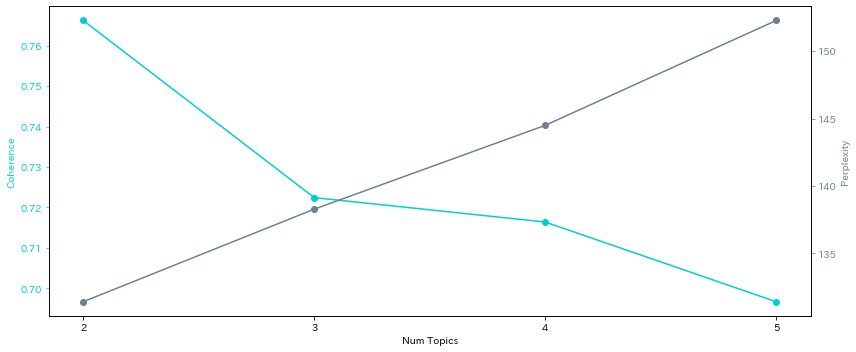

<Figure size 432x288 with 0 Axes>

In [571]:
# evaluation
x = range(start, limit, step)

fig, ax1 = plt.subplots(figsize=(12,5))

# coherence
c1 = 'darkturquoise'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1); ax1.tick_params('y', colors=c1)

# perplexity
c2 = 'slategray'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2); ax2.tick_params('y', colors=c2)

# Vis
ax1.set_xticks(x)
fig.tight_layout()
plt.show()

# save as png
plt.savefig('metrics.png') 

トピック数を推定する方法は多数提案されているが、推定結果が必ずしも一致しない。  
  
ここではクラスター分析の結果なども踏まえて3つのトピックと仮定し、経年情報を取り入れたトピック分析を試みる。  
このようなトピックモデルを**構造的トピックモデル(STM)**、またはダイナミックトピックモデルと呼ぶ。  

各トピックの重要語と、各トピックの割合の経年的な遷移状況を図に示す。

In [572]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dictionary,
                                   iterations=100)

In [573]:
for i in range(3):
    print("\n")
    print("="*80)
    print("TOPIC {0}\n".format(i+1))
    topic = lda_model.show_topic(i, 30)
    for t in topic:
        print("{0:20s}{1}".format(t[0], t[1]))



TOPIC 1

皆様                  0.00617980258539319
選挙                  0.005085872020572424
民間                  0.0044556790962815285
状況                  0.0042176926508545876
役割                  0.004092519637197256
民主                  0.0040314388461411
心                   0.0039914329536259174
物価                  0.003973220940679312
方々                  0.003904373152181506
成立                  0.003868220141157508
税                   0.0037995229940861464
税制                  0.003763429122045636
構築                  0.0037400219589471817
議論                  0.0035512573085725307
再生                  0.0035418143961578608
災害                  0.0034206451382488012
情報                  0.003326195292174816
所存                  0.0032661696895956993
規制                  0.0032452698796987534
関連                  0.0031441180035471916
交渉                  0.003106883028522134
会議                  0.0030364657286554575
医療                  0.003010541433468461
計画                  0.002976400312036

In [574]:
corpus_lda = lda_model[bow_corpus]
arr = gensim.matutils.corpus2dense(
        corpus_lda,
        num_terms=3
        ).T

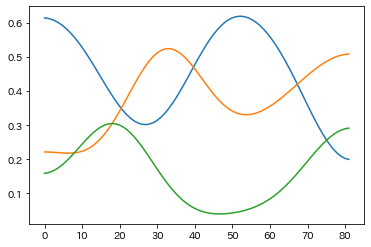

In [575]:
from scipy.ndimage import gaussian_filter1d

xs=np.arange(len(arr))
model=make_interp_spline(xs, arr[:,0])

y_smoothed0 = gaussian_filter1d(arr[:,0], sigma=10)
y_smoothed1 = gaussian_filter1d(arr[:,1], sigma=10)
y_smoothed2 = gaussian_filter1d(arr[:,2], sigma=10)

plt.plot(y_smoothed0)
plt.plot(y_smoothed1)
plt.plot(y_smoothed2)